In [ ]:
#importing Libraries
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# filter for Data Analyst data

df_DA= df[df['job_title_short'] == 'Data Analyst'].copy()

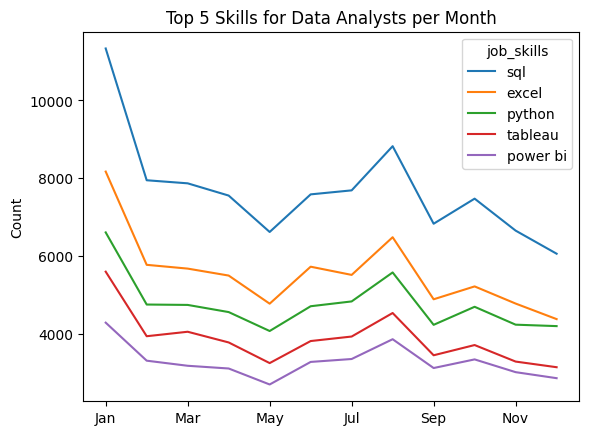

In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# Customizing the line chart

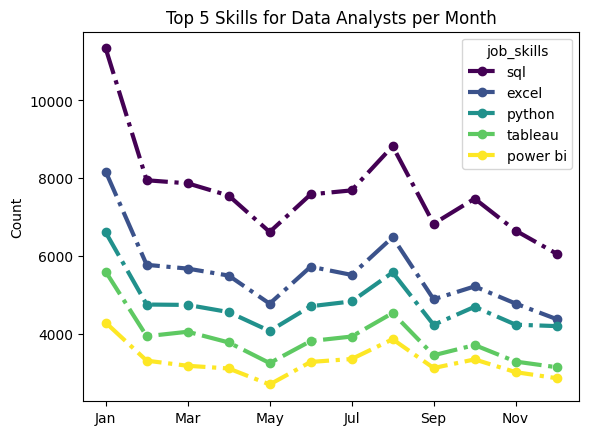

In [11]:
df_DA_pivot.iloc[:, :5].plot(kind='line', linewidth = 3, linestyle= '-.' , #options '--', '-', ':'
                             colormap= 'viridis',
                             marker= 'o',
                             markersize= 5,
                             figsize=(10,5)
                             )

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# Customizing the Scatter Plot

In [34]:
# Explode the 'job_skills' in to the Individual row

df_exploded =df.explode('job_skills')

# Calculate the average salary & count of job postings per skills
skill_stats = df_exploded.groupby('job_skills').agg(
   median_salary =('salary_year_avg', 'median'),
   skill_count =( 'job_skills', 'count')
)

# limiting the top skills

skill_count = 15
skill_stats = skill_stats.sort_values(by = 'skill_count', ascending= False).head(skill_count)

skill_stats


,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


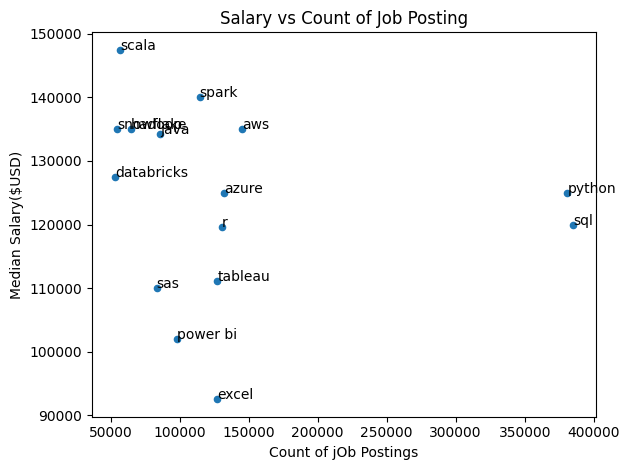

In [35]:

skill_stats.plot(kind='scatter', x = 'skill_count', y ='median_salary')
plt.xlabel('Count of jOb Postings')
plt.ylabel('Median Salary($USD)')
plt.title('Salary vs Count of Job Posting')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i] , txt)

plt.show()

In [ ]:
!pip install adjustText

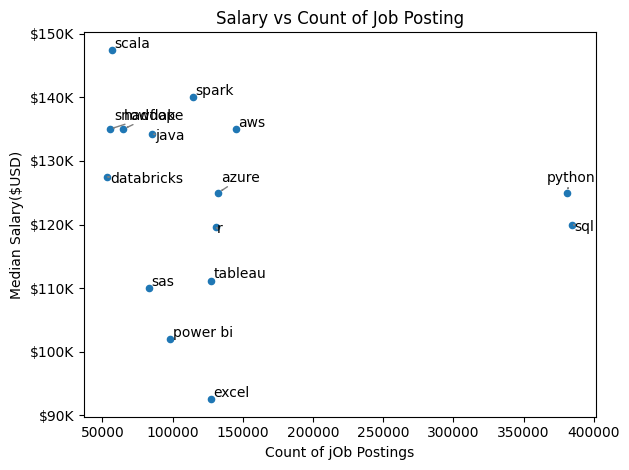

In [36]:
from adjustText import adjust_text

# fig,ax = plt.subplots()


skill_stats.plot(kind='scatter', x = 'skill_count', y ='median_salary')
texts = []


for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i] , " "+ txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))


plt.xlabel('Count of jOb Postings')
plt.ylabel('Median Salary($USD)')
plt.title('Salary vs Count of Job Posting')

plt.tight_layout()

plt.show()

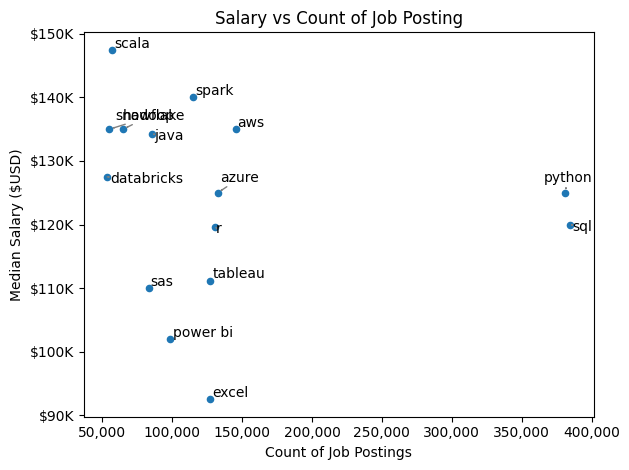

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text

# Assuming skill_stats is your DataFrame and is already defined

# Create the scatter plot
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts = []

# Add text annotations
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Format the y-axis to show thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Format the x-axis to include commas
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Set labels and title
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary ($USD)')
plt.title('Salary vs Count of Job Posting')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
